pip install klib


**Further reading:**
- [klib pypi](https://pypi.org/project/klib/)
* [Andreas Kanz @ Medium](https://medium.com/@akanz)
* [klib Examples on GitHub](https://github.com/akanz1/klib/tree/main/examples)
* [klib on Towards Data Science](https://towardsdatascience.com/speed-up-your-data-cleaning-and-preprocessing-with-klib-97191d320f80)
* [klib Documentation](https://klib.readthedocs.io/en/latest/)



In [1]:
import seaborn as sns

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [3]:
df = sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
import klib

#### klib.describe - functions for visualizing datasets
- klib.cat_plot(df) : returns a visualization of the number and frequency of categorical features\
- klib.corr_mat(df) : returns a color-encoded correlation matrix\
- klib.corr_plot(df) : returns a color-encoded heatmap, ideal for correlations\
- klib.dist_plot(df) : returns a distribution plot for every numeric feature\
- klib.missingval_plot(df) : returns a figure containing information about missing values

#### klib.clean - functions for cleaning datasets

- klib.data_cleaning(df) : performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)\
- klib.clean_column_names(df) : cleans and standardizes column names, also called inside data_cleaning()\
- klib.convert_datatypes(df) : converts existing to more efficient dtypes, also called inside data_cleaning()\
- klib.drop_missing(df) : drops missing values, also called in data_cleaning()\
- klib.mv_col_handling(df) : drops features with high ratio of missing vals based on informational content\
- klib.pool_duplicate_subsets(df) : pools subset of cols based on duplicates with min. loss of information

#### klib.preprocess - functions for data preprocessing (feature selection, scaling, ...)

- klib.train_dev_test_split(df) : splits a dataset and a label into train, optionally dev and test sets\
- klib.feature_selection_pipe() : provides common operations for feature selection\
- klib.num_pipe() : provides common operations for preprocessing of numerical data\
- klib.cat_pipe() : provides common operations for preprocessing of categorical data\
- klib.preprocess.ColumnSelector() : selects num or cat columns, ideal for a Feature Union or Pipeline\
- klib.preprocess.PipeInfo() : prints out the shape of the data at the specified step of a Pipeline

In [5]:
klib.corr_mat(df)


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.00,-0.34,-0.08,-0.04,0.08,0.26,-0.56,-0.20
pclass,-0.34,1.00,-0.37,0.08,0.02,-0.55,0.09,0.14
age,-0.08,-0.37,1.00,-0.31,-0.19,0.10,0.28,0.20
sibsp,-0.04,0.08,-0.31,1.00,0.41,0.16,-0.25,-0.58
parch,0.08,0.02,-0.19,0.41,1.00,0.22,-0.35,-0.58
fare,0.26,-0.55,0.10,0.16,0.22,1.00,-0.18,-0.27
adult_male,-0.56,0.09,0.28,-0.25,-0.35,-0.18,1.00,0.40
alone,-0.20,0.14,0.20,-0.58,-0.58,-0.27,0.40,1.00


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

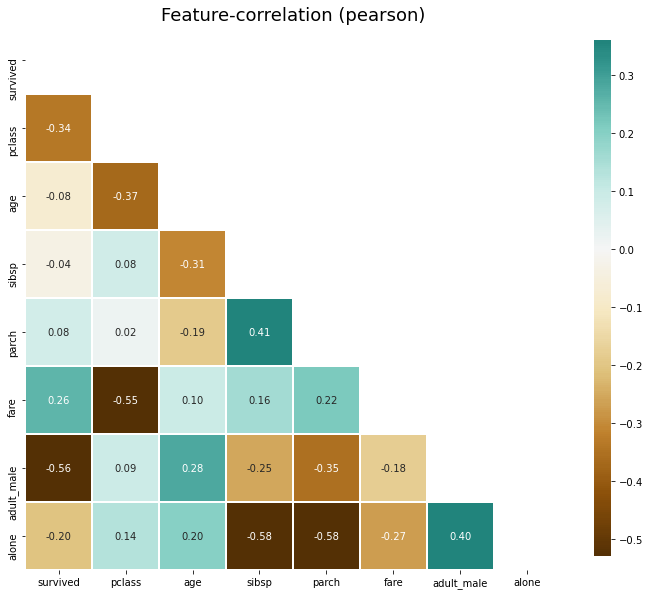

In [6]:
klib.corr_plot(df)

Displaying positive correlations. Specify a positive "threshold" to limit the results further.
Displaying negative correlations. Specify a negative "threshold" to limit the results further.


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

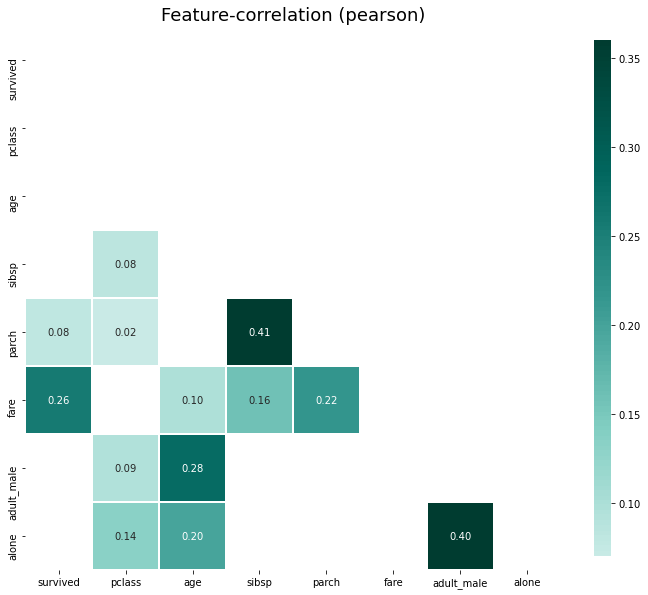

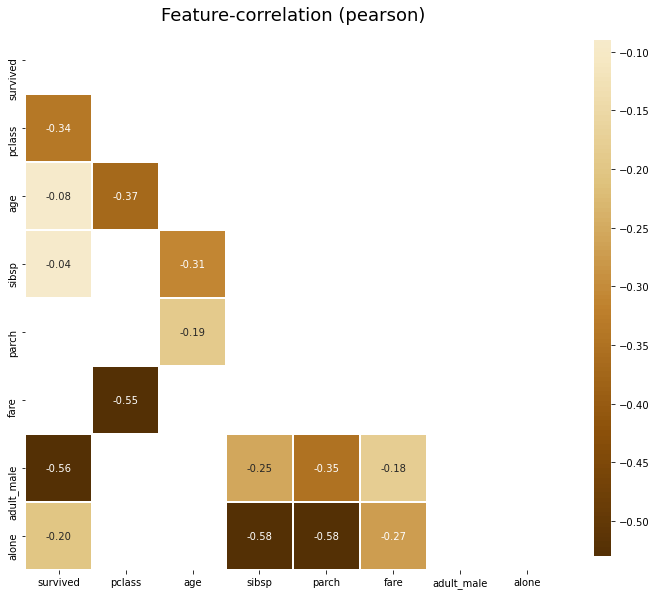

In [7]:
klib.corr_plot(df, split='pos') # displaying only positive correlations, other settings include threshold, cmap...
klib.corr_plot(df, split='neg') # displaying only negative correlations

<AxesSubplot:xlabel='fare', ylabel='Density'>

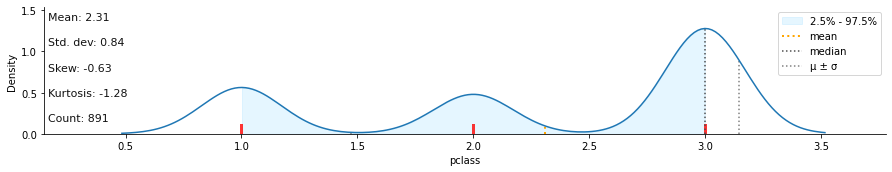

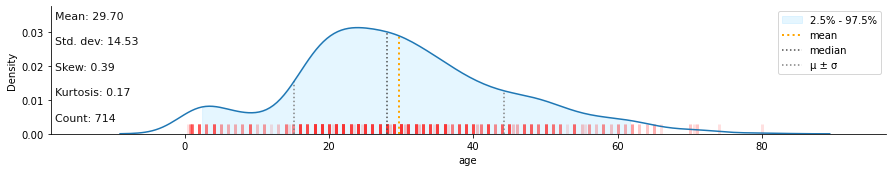

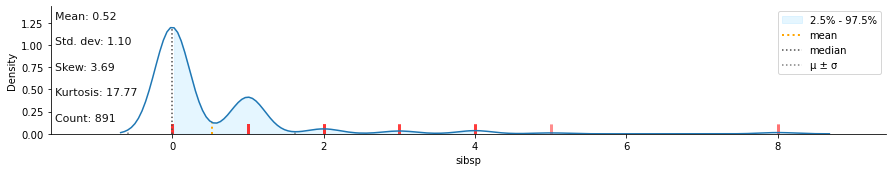

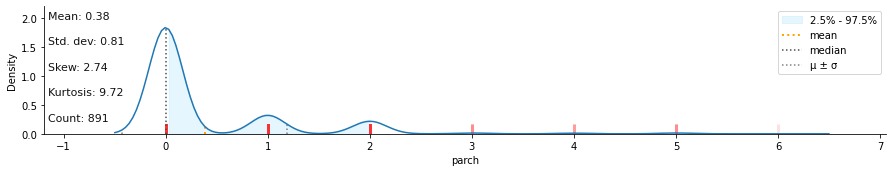

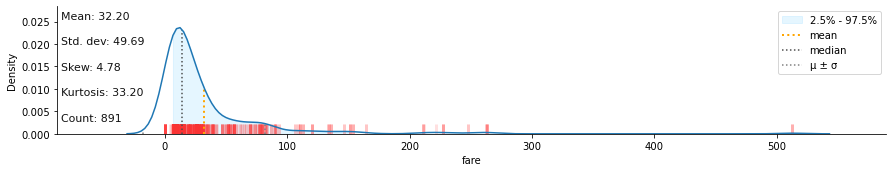

In [8]:
klib.dist_plot(df)

GridSpec(6, 6)

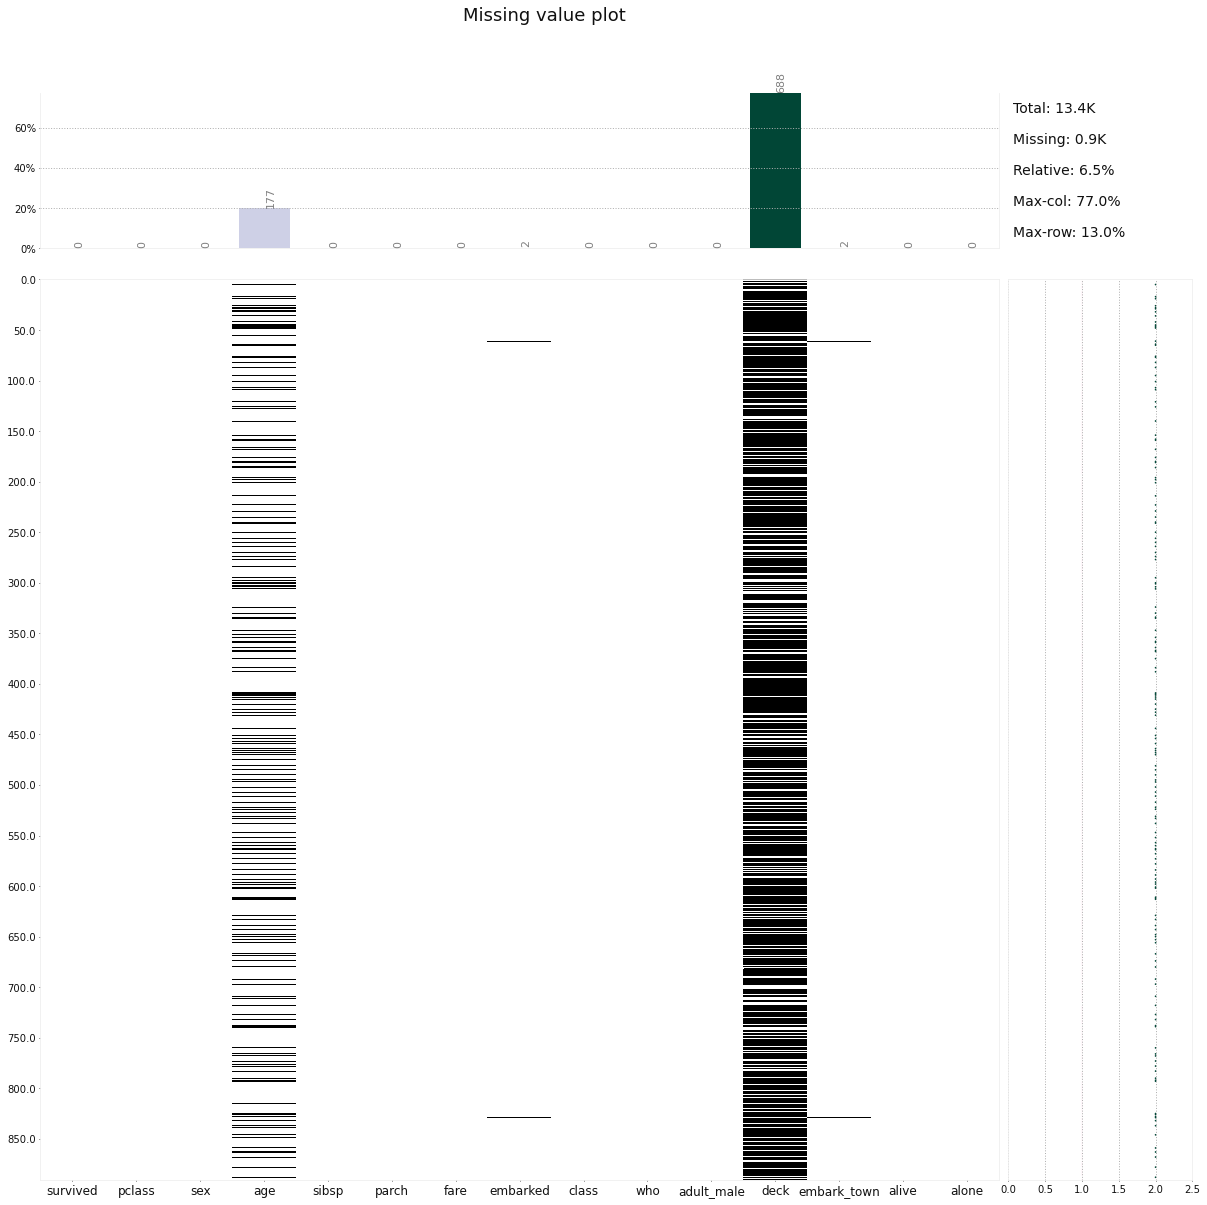

In [9]:
klib.missingval_plot(df)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [11]:
klib.data_cleaning(df)

Shape of cleaned data: (784, 15)Remaining NAs: 692

Changes:
Dropped rows: 107
     of which 107 duplicates. (Rows: [47, 76, 77, 87, 95, 101, 121, 133, 173, 196, 198, 201, 213, 223, 241, 260, 274, 295, 300, 304, 313, 320, 324, 335, 343, 354, 355, 358, 359, 364, 368, 384, 409, 410, 413, 418, 420, 425, 428, 431, 454, 459, 464, 466, 470, 476, 481, 485, 488, 490, 494, 500, 511, 521, 522, 526, 531, 560, 563, 564, 568, 573, 588, 589, 598, 601, 612, 613, 614, 635, 636, 640, 641, 644, 646, 650, 656, 666, 674, 692, 696, 709, 732, 733, 734, 738, 739, 757, 758, 760, 773, 790, 792, 800, 808, 832, 837, 838, 844, 846, 859, 863, 870, 877, 878, 884, 886])
Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 177
Reduced memory by at least: 0.06 MB (-75.0%)



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.283302,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.925,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.099998,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.05,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,0,3,female,39.0,0,5,29.125,Q,Third,woman,False,NaN,Queenstown,no,False
780,1,1,female,19.0,0,0,30.0,S,First,woman,False,B,Southampton,yes,True
781,0,3,female,<NA>,1,2,23.450001,S,Third,woman,False,NaN,Southampton,no,False
782,1,1,male,26.0,0,0,30.0,C,First,man,True,C,Cherbourg,yes,True


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [13]:
klib.clean_column_names(df)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [14]:
klib.convert_datatypes(df)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.283302,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.925,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.099998,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.05,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,<NA>,1,2,23.450001,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0,C,First,man,True,C,Cherbourg,yes,True


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [16]:
klib.drop_missing(df)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


GridSpec(6, 6)

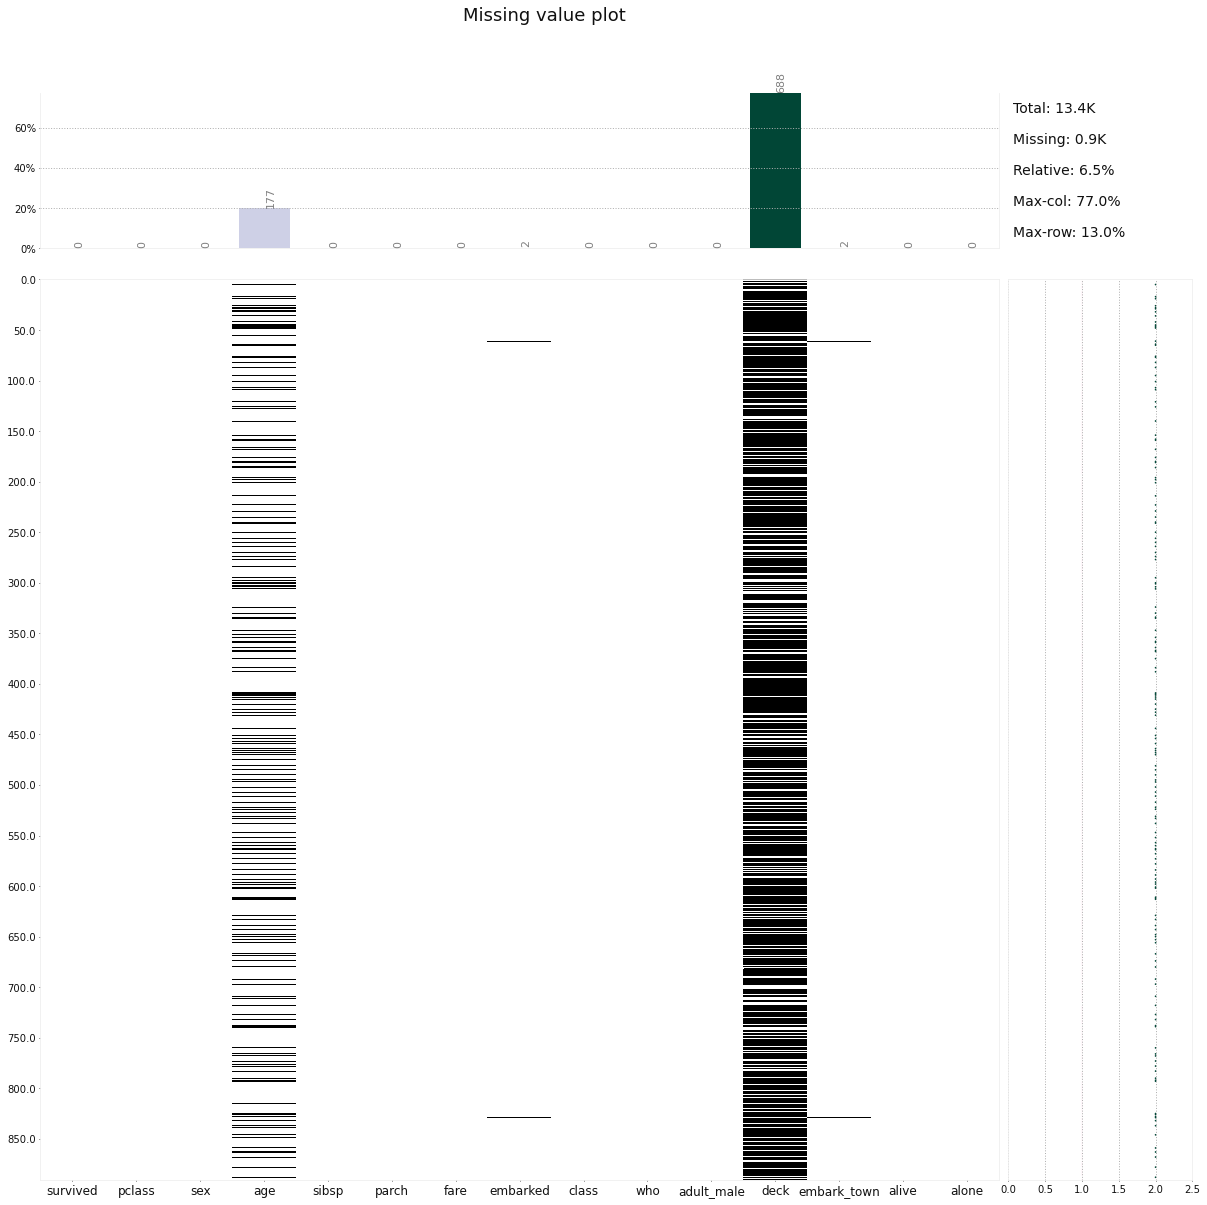

In [17]:
# NFL Dataset
import klib
import pandas as pd

df1 = pd.read_csv("NFL_DATASET.csv")
klib.missingval_plot(df)

## df = pd.read_csv('https://github.com/akanz1/klib/raw/main/examples/NFL_DATASET.csv')


In [18]:
df1

,Unnamed: 0,qtr,down,time,TimeUnder,PlayTimeDiff,yrdln,ydstogo,ydsnet,GoalToGo,...,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA
0,0,3,2.0,08:54,9,37.0,36.0,5,17,0.0,...,NaN,NaN,0.138939,0.861061,0.126569,0.873431,0.138939,-0.012370,NaN,NaN
1,1,3,1.0,12:48,13,15.0,32.0,10,4,0.0,...,NaN,NaN,0.272768,0.727232,0.277266,0.722734,0.727232,-0.004498,NaN,NaN
2,2,4,4.0,04:07,5,5.0,42.0,11,-1,0.0,...,NaN,NaN,0.047530,0.952470,0.044235,0.955765,0.952470,0.003295,NaN,NaN
3,3,2,1.0,06:49,7,0.0,20.0,10,48,0.0,...,0.640774,2.464259,0.999998,0.000002,0.999989,0.000011,0.000002,0.000010,7.889122e-07,0.000009
4,4,2,NaN,02:00,2,28.0,27.0,0,22,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183455,183455,2,1.0,00:00,0,6.0,1.0,1,-4,1.0,...,NaN,NaN,0.868074,0.131926,0.813265,0.186735,0.868074,-0.054810,NaN,NaN
183456,183456,4,4.0,11:51,12,37.0,42.0,19,27,0.0,...,NaN,NaN,0.619869,0.380131,0.530878,0.469122,0.619869,-0.088991,NaN,NaN
183457,183457,1,2.0,08:34,9,34.0,9.0,8,42,0.0,...,NaN,NaN,0.627948,0.372052,0.600286,0.399714,0.627948,-0.027662,NaN,NaN
183458,183458,4,2.0,12:07,13,39.0,29.0,10,31,0.0,...,-1.455873,2.682705,0.757373,0.242627,0.715155,0.284845,0.242627,0.042218,-4.716191e-02,0.089380


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183460 entries, 0 to 183459
Data columns (total 67 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           183460 non-null  int64  
 1   qtr                  183460 non-null  int64  
 2   down                 155933 non-null  float64
 3   time                 183361 non-null  object 
 4   TimeUnder            183460 non-null  int64  
 5   PlayTimeDiff         183264 non-null  float64
 6   yrdln                183078 non-null  float64
 7   ydstogo              183460 non-null  int64  
 8   ydsnet               183460 non-null  int64  
 9   GoalToGo             183078 non-null  float64
 10  FirstDown            170487 non-null  float64
 11  posteam              172113 non-null  object 
 12  DefensiveTeam        172113 non-null  object 
 13  desc                 183459 non-null  object 
 14  PlayAttempted        183460 non-null  int64  
 15  Yards.Gained     

Displaying positive correlations. Specify a positive "threshold" to limit the results further.
Displaying negative correlations. Specify a negative "threshold" to limit the results further.


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

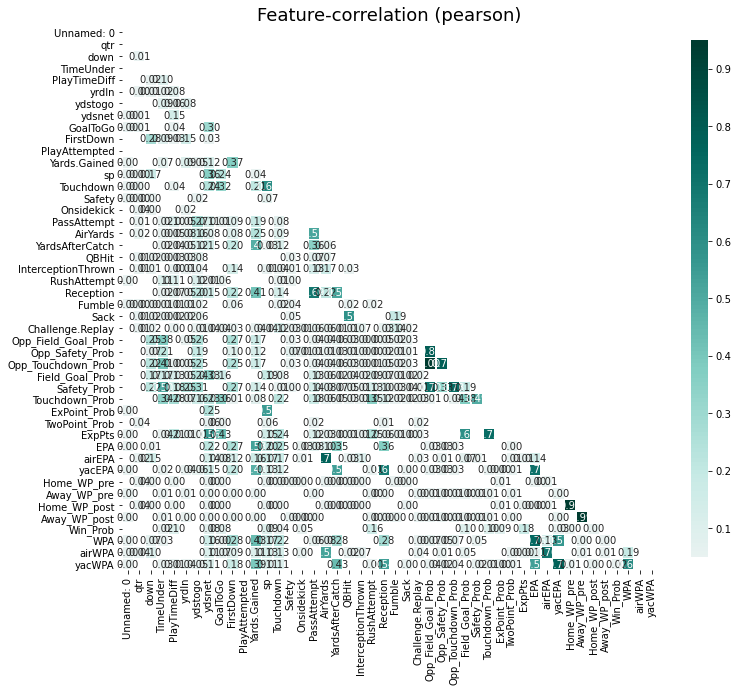

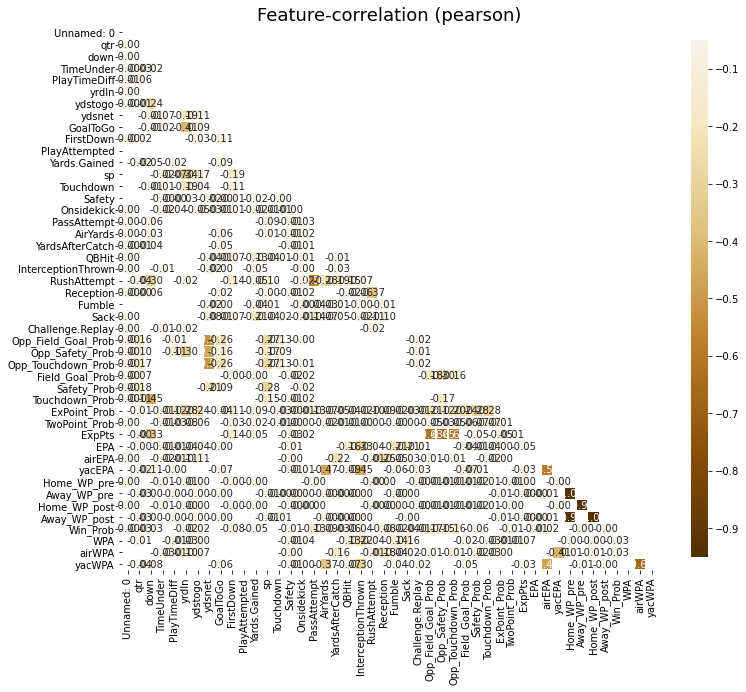

In [20]:
klib.corr_plot(df1, split='pos') # displaying only positive correlations, other settings include threshold, cmap...
klib.corr_plot(df1, split='neg') # displaying only negative correlations

#### Preprocess

In [24]:
klib.preprocess.PipeInfo(df1)

PipeInfo(name=        Unnamed: 0  qtr  down   time  TimeUnder  PlayTimeDiff  yrdln  ydstogo  \
0                0    3   2.0  08:54          9          37.0   36.0        5   
1                1    3   1.0  12:48         13          15.0   32.0       10   
2                2    4   4.0  04:07          5           5.0   42.0       11   
3                3    2   1.0  06:49          7           0.0   20.0       10   
4                4    2   NaN  02:00          2          28.0   27.0        0   
...            ...  ...   ...    ...        ...           ...    ...      ...   
183455      183455    2   1.0  00:00          0           6.0    1.0        1   
183456      183456    4   4.0  11:51         12          37.0   42.0       19   
183457      183457    1   2.0  08:34          9          34.0    9.0        8   
183458      183458    4   2.0  12:07         13          39.0   29.0       10   
183459      183459    4   1.0  03:58          4          1...
3           0.999989      0.00001

In [26]:
klib.preprocess.PipeInfo(df)

PipeInfo(name=     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  3...
       who  adult_male deck  embark_town alive  alone  
0      man        True  N

In [27]:
klib.preprocess.ColumnSelector(df)

ColumnSelector(num=     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3...
       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  So

In [29]:
klib.num_pipe()

Pipeline(steps=[('columnselector', ColumnSelector()),
                ('iterativeimputer',
                 IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=25,
                                                                n_jobs=4,
                                                                random_state=408),
                                  random_state=408)),
                ('robustscaler', RobustScaler())])

In [31]:
klib.feature_selection_pipe()

Pipeline(steps=[('variancethreshold', VarianceThreshold(threshold=0.1)),
                ('pipeinfo-1', PipeInfo(name='after var_thresh')),
                ('selectfrommodel',
                 SelectFromModel(estimator=LassoCV(cv=4, random_state=408),
                                 threshold='0.1*median')),
                ('pipeinfo-2', PipeInfo(name='after select_from_model')),
                ('selectpercentile', SelectPercentile(percentile=95)),
                ('pipeinfo-3', PipeInfo(name='after select_percentile'))])